<center><p float='center'>
  <img src="https://raw.githubusercontent.com/agcunning25-byte/UCI_HeartDisease_Classification/main/Heart.png" width="1440"/>
</p></center>

<center><font size=24>Heart Disease Detection and Classification</center></font>
<center><font size=6>Using the UCI dataset from Kaggle</center><font>

# **Problem Statement**

## **Business Context**

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## **Objective**

Working as a Data Scientist, our job is to create a machine learning model capable of revealing hidden patterns and complex connections among cardiovascular risk factors to not only forecast heart disease but also pinpoint the key contributors to that prediction.

## **Data Dictionary**

Attribute Information:
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* Chest Pain Type: chest pain type [TA: Typical Angina (triggered by stress or exertion), ATA: Atypical Angina (similar to typical angina, but may happen at rest or be less predictable), NAP: Non-Anginal Pain (does not fit the pattern of heart-related angina - e.g. musculoskeletal, GI issues, anxiety), ASY: Asymptomatic]
* Resting BP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* Fasting BS: fasting blood sugar [1: if Fasting BS > 120 mg/dl, 0: otherwise]
* Resting ECG: resting electrocardiogram results
[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression
of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria].
* Max HR: maximum heart rate achieved [Numeric value between 60 and 202]
* Exercise Angina: exercise-induced angina [Y: Yes, N: No]
* Old peak: old peak = ST [Numeric value measured in depression]
* ST _Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: down sloping]
* Heart Disease: output class [1: heart disease, 0: Normal]

# **Importing necessary libraries**

In [2]:
# For reading and manipulating data
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split datasets
from sklearn.model_selection import train_test_split

# For one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# For scaling data
from sklearn.preprocessing import StandardScaler

# Importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# For cross-validation
from sklearn.model_selection import GridSearchCV

# To get different performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score

# If needed, libraries for interpretability
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.tree import export_text


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Loading the Data**

In [4]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Loading the dataset from drive
data = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')

In [6]:
# Making a copy of the data
df = data.copy()

# **Data Overview**

In [7]:
# Taking a look at the shape of the dataset
df.shape

(918, 12)

 * We've got 918 rows and 12 columns in the dataset

In [8]:
# Taking a look at the head
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# Taking a look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


* We have 7 numerical columns (6 integer and 1 float) and 5 categorical (object) columns.

In [10]:
# Looking for duplicate values
df.duplicated().sum()

np.int64(0)

* There are no duplicated values in the dataset.

In [11]:
# Checking for missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


* There are no missing values in the dataset

In [12]:
df.describe(include='number')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* Age ranges from 28 to 77 with a mean of 53.5 and median of 54, suggesting a normal distribution. 50% of our ages range between 47 and 60.
* Resting BP ranges from 0 to 200 which means there are obviously some bad datapoints there, as 0 would indicate death. Also, the range implies this is the systolic pressure (the 120 of 120 over 80). We'll need to dig into this in univariate analysis because that 0 is throwing all of our other data off. However, with 75% of our dataset having 140 or less, indicates 75% of datapoint reflect lower/healthy to slightly elevated/higher than ideal BP.
* Cholesterol numbers suggest this is total cholesterol levels. They range from 0 to 603, which again suggests bad data. The median is 223 which would put about 50% of our datapoints at-risk of developing heart disease.
* FastingBS values range from 0 to 1 as indicated in the data dictionary. The median is 0, and 75th percentile is also 0 indicated highly skewed distribution, but this is a good thing for the data, since 1 indicates prediabetic or diabetic conditions.
* MaxHR ranges from 60 to 202. With an average of 13638 and median of 138, our data here suggests a normal distribution.
* Oldpeak ranges from -2.6 to 6.2. -2.6 indicates bad data as that is not possible in a patient. Oldpeak ranges should be from 0 to ~6. With 75% of the datapoints being 1.5 or below, most of our datapoints indicate good heart health as Oldpeak of 2.0 to 6.0 indicate moderate to severe ST depression, which is indicative of abnormal heart response under stress.
* HeartDisease ranges from 0 to 1 as indicated in the dictionary. According to these numbers half of our dataset are labeled as having heart disease and half do not.

In [13]:
# Displaying the statistical summary of the object columns
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


* Sex is heavily skewed with Male representing about 75% of the dataset.
* Asymptomatic ChestPainType is the most frequent, representing about half of the dataset.
* RestingECG is Normal for a little over half of our dataset
* ExerciseAngina reflects roughly the same numbers as our ChestPainType as a little over half of the dataset have N as the value.
* ST_Slope shows that around half of the dataset exhibit a Flat ST slope which is suspicious for heart disease.

## **Data Cleaning**

In [14]:
# Isolating the instance of 0 value in RestingBP
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


* This datapoint is clearly bad data as RestingBP and Cholestrol are both 0. Let's see if we can't find any other data points that share the other values though.

In [15]:
# Creating a dataframe of like values to check for similar instances
df[(df['Age'] == 55) & (df['Sex'] == 'M') & (df['RestingECG'] == 'Normal') & (df['MaxHR'] == 155) & (df['ExerciseAngina'] == 'N') & (df['Oldpeak'] == 1.5) & (df['ST_Slope'] == 'Flat')]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


* Since this is the only instance of these particular other values, we have no choice but to remove this row from the dataset.

In [16]:
# Dropping index row 449 from the dataset and resetting the index.
df.drop(449, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [17]:
# Doublechecking the statistical summary to see if we've gotten rid of all 0 values where they can't possibly be.
df.describe(include='number')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* We've eliminated all 0 values from RestingBP, so we'll now isolate instances of 0 cholesterol.

In [18]:
# Isolating indexes with 0 value for Cholesterol
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
513,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
514,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
517,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
534,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


* There are 171 rows with 0 for Cholesterol level. We can't afford to drop these, so we'll need to deal with these missing values after train test split. We'll group by age range, sex, and FastingBS (since diabetic patients have significantly higher cholesterol) calculate the average cholesterol and apply to the missing values. For now, we'll make a copy of the dataframe so we can visualize and inspect it further during EDA.

In [19]:
# Making a copy of the dataframe
df_chol = df.copy()

In [20]:
# Creating age bins
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df_chol['Age_Group'] = pd.cut(df_chol['Age'], bins=bins, labels=labels)

In [21]:
# Creating a list of the columns to groupby
groupby_cols = ['Age_Group', 'Sex', 'FastingBS']

# Grouping by Age_Group, Sex, and FastingBS and calculating the mean of Cholesterol
group_means = df_chol[df_chol['Cholesterol'] != 0].groupby(groupby_cols)['Cholesterol'].mean()

# Creating a function to fill the columns with the means
def fill_missing_chol(row):
    if row['Cholesterol'] == 0:                                                       # If Cholesterol value is 0
        try:                                                                          # try
          return group_means.loc[(row['Age_Group'], row['Sex'], row['FastingBS'])]    # to return the group_mean
        except KeyError:                                                              # unless you get an error
          return df_chol.loc[df_chol['Cholesterol'] != 0, 'Cholesterol'].mean()       # then return the mean of the entire dataset where Cholesterol is filled in
    else:
        return row['Cholesterol']                                                     # If Cholesterol already has a value, return that value

# Filling in the dataframe using the function
df_chol['Cholesterol'] = df_chol.apply(fill_missing_chol, axis=1)

# Dropping the Age_Group column now that we no longer need it.
df_chol.drop('Age_Group', axis=1, inplace=True)

* Now let's check the statistical summary again.

In [22]:
df_chol.describe(include='number')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,916.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,245.268954,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.943175,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,243.807018,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,270.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


* It seems this made a big impact on our statistical values. The mean is now much higher at 245 and our median is now 243 - suggesting a pretty normal distribution. 75% of our dataset exhibits signs of borderline high cholesterol levels, and 50% have high cholesterol levels.

In [23]:
# Isolating instances in which Oldpeak is negative
df[df['Oldpeak'] < 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
321,63,M,ASY,100,0,1,Normal,109,N,-0.9,Flat,1
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
326,45,M,NAP,110,0,0,Normal,138,N,-0.1,Up,0
331,56,M,ASY,115,0,1,ST,82,N,-1.0,Up,1
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up,0
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up,1
335,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
352,56,M,ASY,120,0,0,ST,100,Y,-1.0,Down,1
407,62,M,ASY,115,0,1,Normal,72,Y,-0.5,Flat,1


* We know that Oldpeak (except in exceedingly rare instances) cannot be negative. We'll replace negative values with 0.

In [24]:
# Replacing negative values in Oldpeak with 0
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: 0 if x < 0 else x)
df_chol['Oldpeak'] = df_chol['Oldpeak'].apply(lambda x: 0 if x < 0 else x)

# **Exploratory Data Analysis**

## **Univariate Analysis**

### Utility Functions

In [25]:
def histogram_boxplot(data, feature, figsize=(8, 5), kde=True, title=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (8, 5))
    kde: whether to show the density curve (default False)
    title: optional title for the plot
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, color="skyblue"
    )

    # Add mean and median lines
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
    ax_hist2.legend()

    # Add title if provided, otherwise create default title
    if title is None:
        title = f"Distribution of {feature}"
    f2.suptitle(title, fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        legend=False,
        order=data[feature].value_counts().index[:n]
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(f"Percentage by {feature}", fontsize=20)
    plt.show()  # show the plot

### Numeric Variables

#### Age

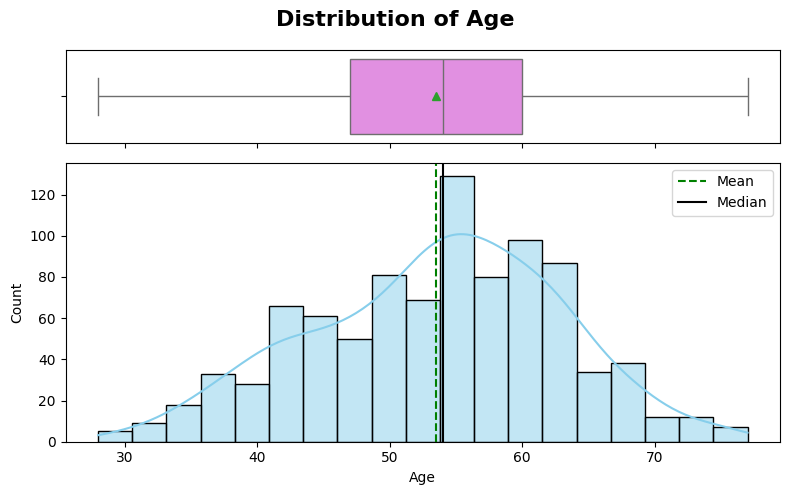

In [27]:
# Visualizing the distribution of Age
histogram_boxplot(df, 'Age')

* The distribution looks relatively normal with mean and median in close proximity to one another.

#### RestingBP

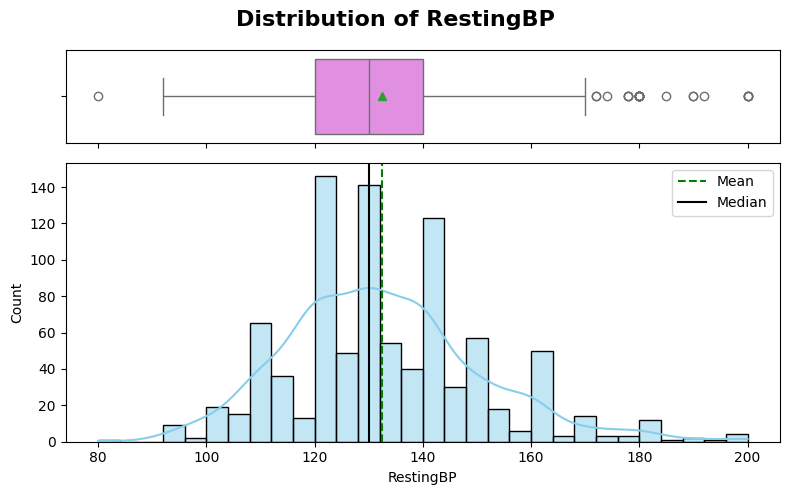

In [28]:
# Visualizing the distribution of RestingBP
histogram_boxplot(df, 'RestingBP')

* The distribution is ever so slightly right skewed, let's check the skew value.

In [29]:
# Checking the skew for RestingBP
df['RestingBP'].skew()

np.float64(0.6071947160162691)

* With a skew value of only .607, we'll leave as is for our Linear Regression model.

#### Cholesterol

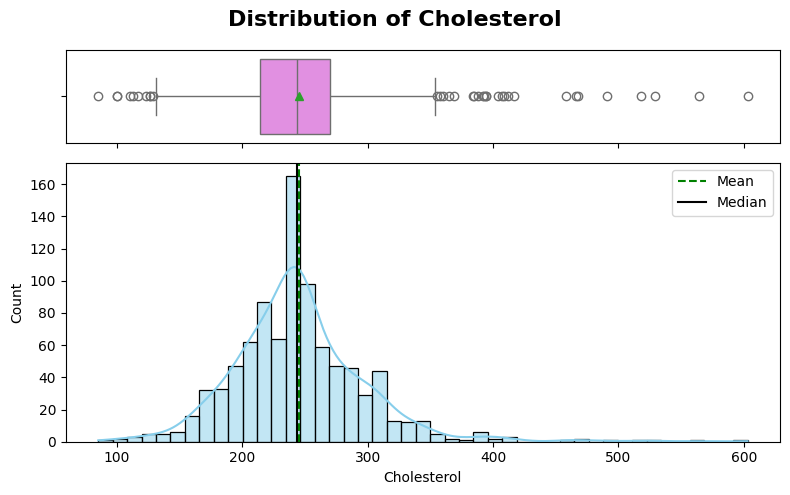

In [30]:
# Visualizing the distribution of Cholesterol
histogram_boxplot(df_chol, 'Cholesterol')

* Though we fixed the problem earlier with the 0 values, there is still a very long tail to the distribution. Let's check for skewness and determine whether to leave as is, or log transform later.

In [31]:
# Checking skewness for Cholesterol
df_chol['Cholesterol'].skew()

np.float64(1.3147800200694084)

* Very skewed, we'll log transform this using np.log later during preprocessing.

#### Fasting BS

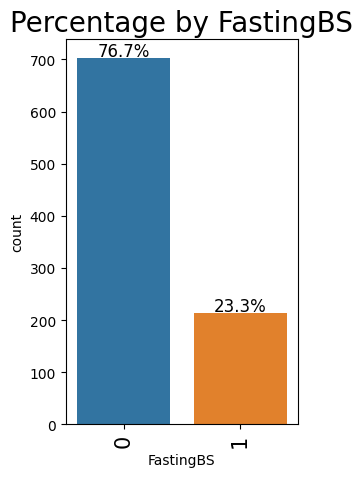

In [32]:
# Visualizing the distribution of Fasting BS
labeled_barplot(df, 'FastingBS')

* 23.3% of the patients exhibit fasting blood sugar levels consistent with diabetes or prediabetes.

#### Max HR

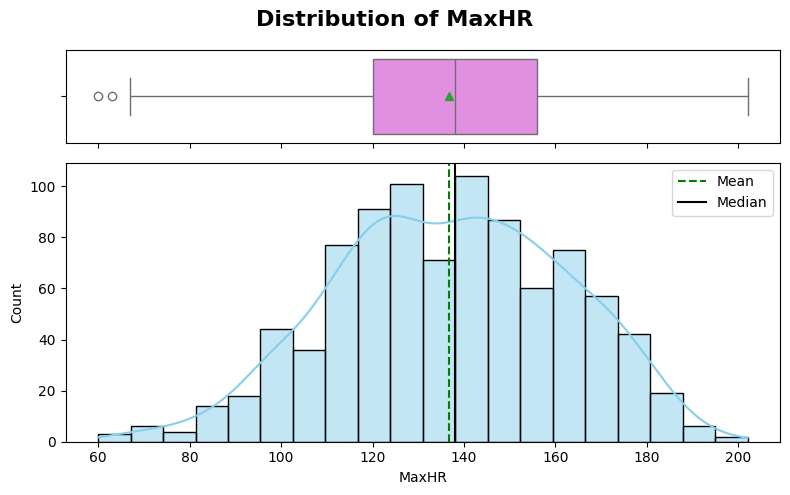

In [33]:
# Visualizing the distribution of Max HR
histogram_boxplot(df, 'MaxHR')

* Very normal distribution for Max HR, with a ever so slight left skew. We'll leave as is for Logistic Regression.

#### Oldpeak

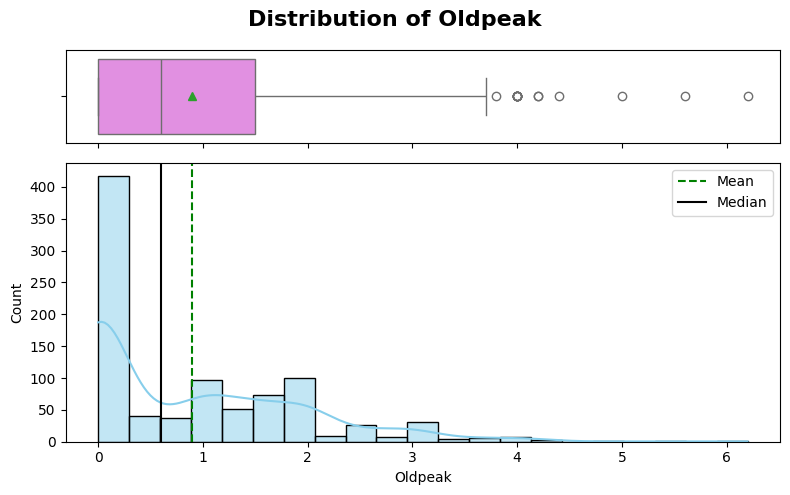

In [34]:
# Visualizing the distribution of Oldpeak
histogram_boxplot(df, 'Oldpeak')

* Very right-skewed distribution as the vast majority (~80%) of patients are exhibiting healthy signs of Old Peak. However, let's check the skew level to determine whether we'll log transform this for Logistic Regression.

In [35]:
# Checking the skew value of Oldpeak
df['Oldpeak'].skew()

np.float64(1.157992970266065)

* With a value well over 1.0, we'll log transform this using np.log1p before handing off to our Logistic Regression model.

### Categorical Variables

#### Sex

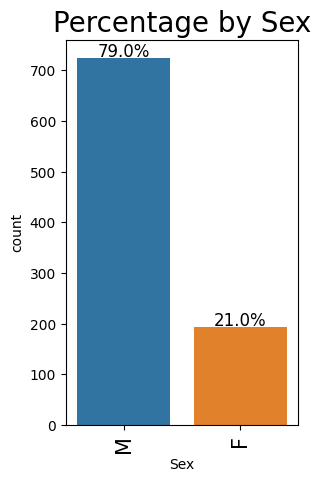

In [36]:
# Visualizing the distribution of Sex
labeled_barplot(df, 'Sex')

* Only 21% of the patients in the dataset are female. 79% male.

#### Chest Pain Type

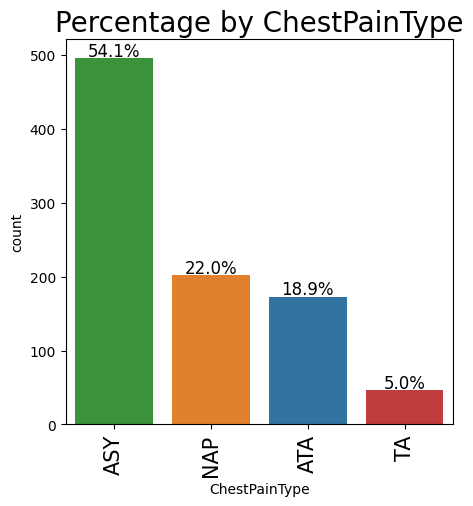

In [37]:
# Visualizing the distribution of Chest Pain Type
labeled_barplot(df, 'ChestPainType')

* 54% of our patients did not exhibit any symptoms of Angina, 22% had pain not related to Angina, and around a quarter of patients exhibited signs of some type of Angina.

#### Resting ECG

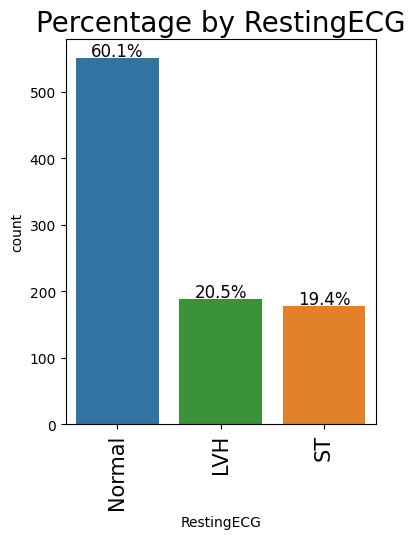

In [38]:
# Visualizing the distribution of Resting ECG
labeled_barplot(df, 'RestingECG')

* 60% of our patients show normal results of a resting ECG, and around ~40% showed signs of either left ventrical hypertrophy or abnormalities in their ST-T wave.

#### Exercise Angina

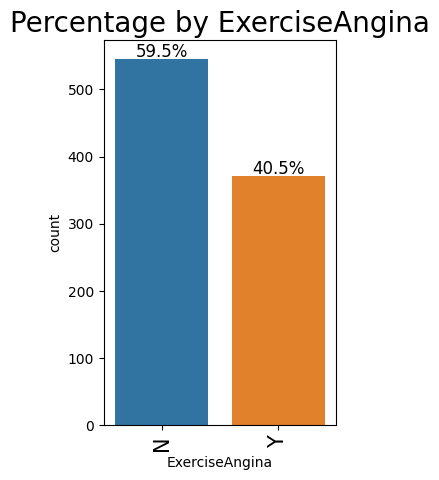

In [39]:
# Visualizing the distribution of Exercise Angina
labeled_barplot(df, 'ExerciseAngina')

* I believe we'll see that this is highly correlated with ChestPainType as the numbers are very similar. When it comes down to it, we may end up dropping this feature as ChestPainType provides more information for us.

#### ST Slope

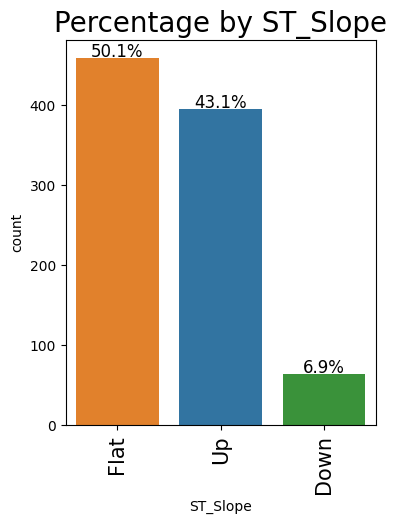

In [40]:
# Visualizing the distribution of ST Slope
labeled_barplot(df, 'ST_Slope')

* About 43% exhibit normal signs of heart health with an upsloping ST slope. Unfortunately, 50% exhibit signs that may suggest low blood flow with a flat ST slope. ~7% show signs of definitive blockage of some sort.

#### Target Variable: Heart Disease

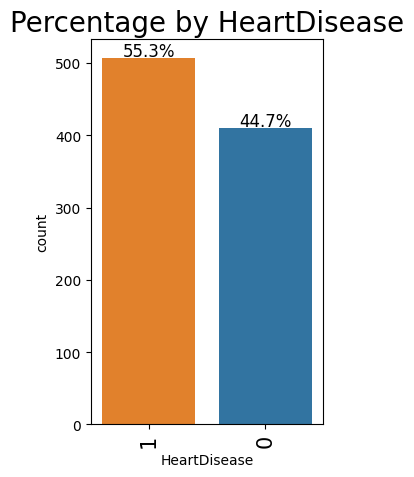

In [41]:
# Visualizing the distribution of Heart Disease
labeled_barplot(df, 'HeartDisease')

* Unfortunately, ~55% of the patients in this dataset are labeled as having heart disease.

## **Bivariate Analysis**



### Numeric Correlations

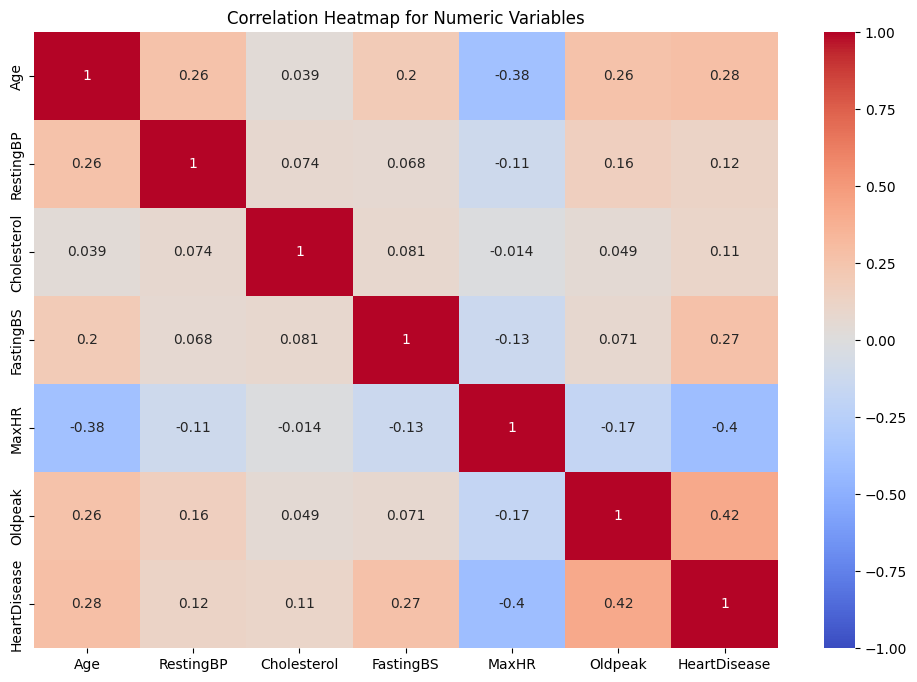

In [42]:
# Plotting the confusion matrix for our numeric values
plt.figure(figsize=(12, 8))
sns.heatmap(df_chol.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()

* It seems Oldpeak and MaxHR are our two variables most highly correlated with Heart Disease. Oldpeak has a positive relationship of 0.42 while MaxHR has a negative relationship at -0.4.

### All Variables

In [43]:
# Importing stats to calculate categorical correlation
import scipy.stats as stats
from scipy.stats import chi2_contingency

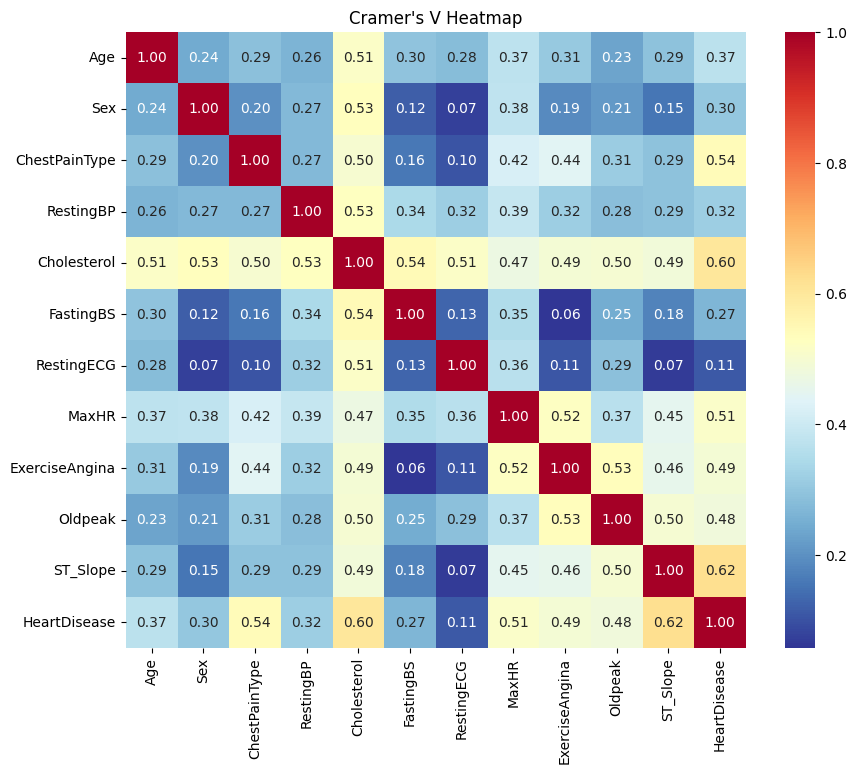

In [44]:
# Keep only categorical columns and Heart Disease
cat_cols = df_chol.columns.tolist()

# Initialize an empty dataframe to store results
cramers_matrix = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)

# Function to calculate contingency coefficient
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(table)
    n = table.sum().sum()
    k = min(table.shape)
    V = np.sqrt(chi2 / (n * (k-1)))
    return V

# Loop through pairs of columns
for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0  # perfect association with itself
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix.astype(float), annot=True, cmap=('RdYlBu_r'), fmt=".2f")
plt.title("Cramer's V Heatmap")
plt.show()

* We've got some really strong correlations between our target variable and the following variables:
1. ST_Slope
2. Cholesterol
3. ChestPainType
4. MaxHR
5. ExerciseAngina
6. Oldpeak

We'll visualize those relationships with Heart Disease.

### ST_Slope v. Heart Disease

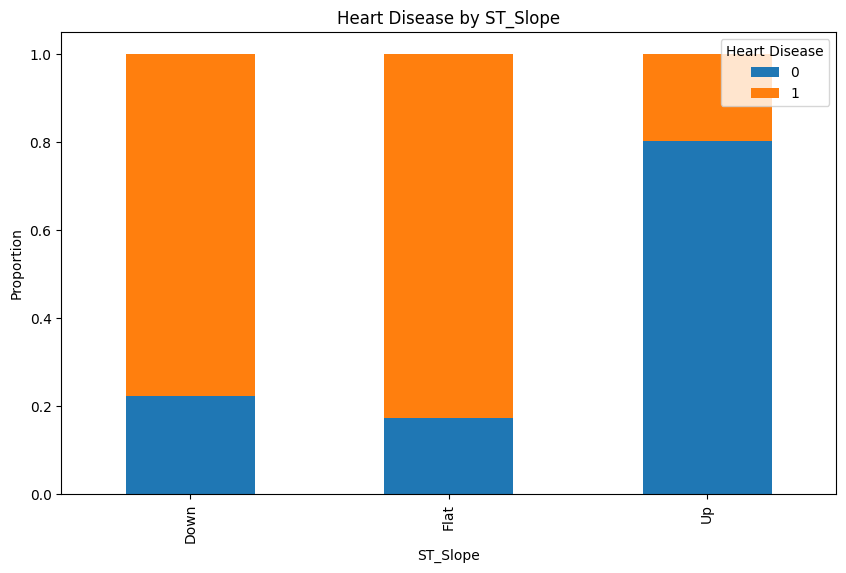

In [45]:
# Visualizing the relationship between ST_Slop and Heart Disease
st_hd_df = df.groupby('ST_Slope')['HeartDisease'].value_counts(normalize=True).unstack()
st_hd_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Heart Disease by ST_Slope')
plt.xlabel('ST_Slope')
plt.ylabel('Proportion')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

* The vast majority (~80%) of patients with a flat or downsloping ST_Slope are positive for Heart Disease.

### Cholesterol v. Heart Disease

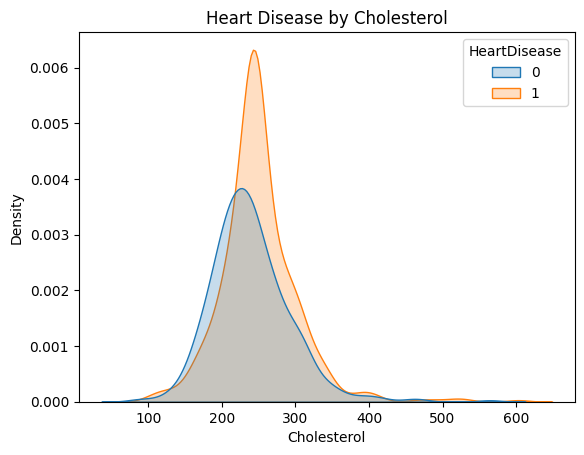

In [46]:
# Visualizing the relationship between Cholesterol and Heart Disease
sns.kdeplot(data=df_chol, x='Cholesterol', hue='HeartDisease', fill=True)
plt.title('Heart Disease by Cholesterol')
plt.xlabel('Cholesterol')
plt.ylabel('Density')
plt.show()

* The distribution for Heart Disease is very similar for those with cholesterol ranging from < 100 to around 200, but then there is a marked increase in heart disease in cholesterol levels of 200+, especially around the 220 mark.

### ChestPainType v. Heart Disease

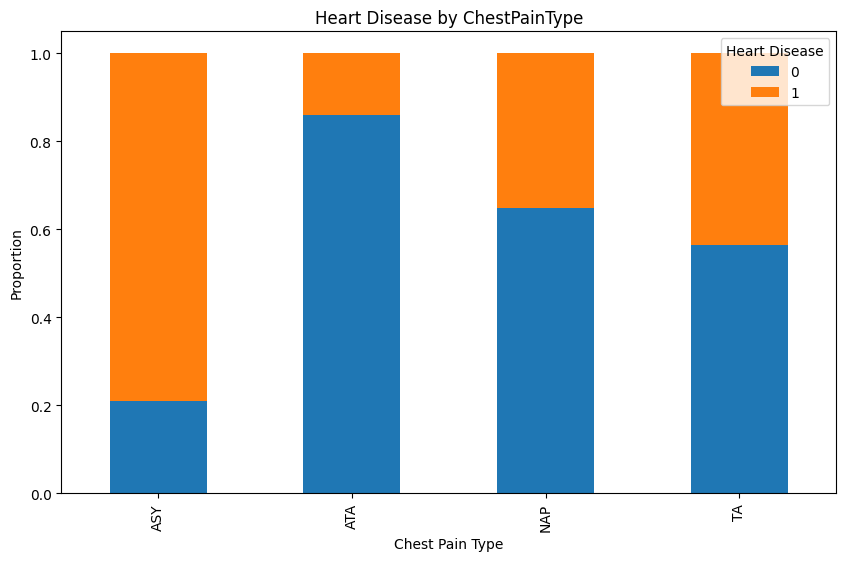

In [47]:
# Visualizing the relationship between ChestPainType and HeartDisease
st_hd_df = df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True).unstack()
st_hd_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Heart Disease by ChestPainType')
plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

* Very surprising that those within our dataset that are not showing any signs of Angina have the highest proportion of heart disease. Coupled with the findings in Cholesterol levels, it seems that one of the problems associated with heart disease is that it can be difficult to catch!

* We'll isolate patients with ASY ChestPainType and compare other statistics to see if we can engineer some features to help in identifying ASY patients with Heart Disease.

In [48]:
# Looking at the statistical summary of just those with ASY ChestPain and Heart Disease
df_chol[(df_chol['ChestPainType'] == 'ASY') & (df_chol['HeartDisease'] == 1)].describe(include='number')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,392.000000,392.000000,391.000000,392.000000,392.000000,392.000000,392.0
mean,55.660714,134.091837,251.222429,0.339286,125.806122,1.352806,1.0
std,8.737413,18.895641,54.665773,0.474072,22.548343,1.124178,0.0
min,31.000000,92.000000,100.000000,0.000000,60.000000,0.000000,1.0
25%,50.750000,120.000000,223.000000,0.000000,110.000000,0.175000,1.0
50%,56.500000,130.000000,245.343750,0.000000,125.000000,1.300000,1.0
75%,62.000000,145.000000,275.000000,1.000000,141.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,182.000000,6.200000,1.0


In [49]:
# Looking at the statistical summary of just those with ASY ChestPain and no Heart Disease
df_chol[(df_chol['ChestPainType'] == 'ASY') & (df_chol['HeartDisease'] == 0)].describe(include='number')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.0
mean,52.317308,129.980769,245.269824,0.076923,138.548077,0.525000,0.0
std,8.387768,17.039634,59.434436,0.267760,24.303054,0.734285,0.0
min,35.000000,80.000000,85.000000,0.000000,69.000000,0.000000,0.0
25%,46.000000,120.000000,210.500000,0.000000,122.000000,0.000000,0.0
50%,52.500000,130.000000,236.955801,0.000000,140.000000,0.050000,0.0
75%,58.000000,140.000000,271.250000,0.000000,154.250000,1.000000,0.0
max,75.000000,180.000000,458.000000,1.000000,186.000000,3.000000,0.0


In [50]:
# Looking at the statistical summary of just those with ASY ChestPain and Heart Disease
df_chol[(df_chol['ChestPainType'] == 'ASY') & (df_chol['HeartDisease'] == 1)].describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,392,392,392,392,392
unique,2,1,3,2,3
top,M,ASY,Normal,Y,Flat
freq,353,392,224,268,289


In [51]:
# Looking at the statistical summary of just those with ASY ChestPain and no Heart Disease
df_chol[(df_chol['ChestPainType'] == 'ASY') & (df_chol['HeartDisease'] == 0)].describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,104,104,104,104,104
unique,2,1,3,2,3
top,M,ASY,Normal,N,Up
freq,73,104,60,75,71


* Oldpeak and ST_Slope are the two biggest differences within these two groups and may help in predicting heart disease when patients are asymptomatic of Angina. FastingBS is also a helpful predictor.
* Patients with HeartDisease show a much higher Oldpeak on average than those wihtout. In fact, 75% of those without are below 1.0 in Oldpeak value, while ~40% of those with Heart Disease are 1.0+.
* Not surprisingly, ST_Slope is more often upsloping in healthy individuals, but flat for those with Heart Disease - not unsimilar from the rest of the dataset.
* About 30% of those with Heart Disease are showing diabetic signs of FastingBS levels, while only about 7% of healthy individuals do.

### MaxHR v. Heart Disease

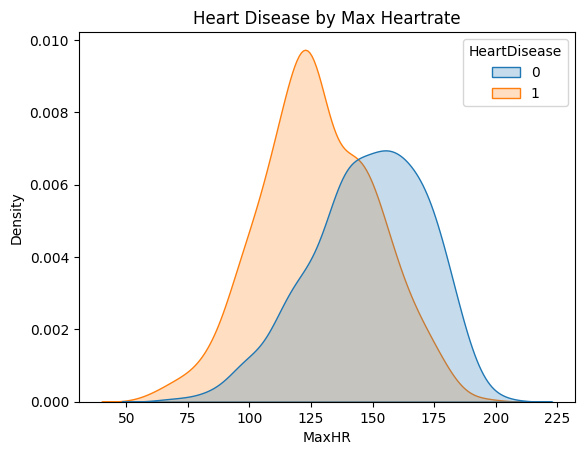

In [52]:
# Visualizing the relationship between MaxHR and Heart Disease
sns.kdeplot(data=df, x='MaxHR', hue='HeartDisease', fill=True)
plt.title('Heart Disease by Max Heartrate')
plt.xlabel('MaxHR')
plt.ylabel('Density')
plt.show()

* Those with a MaxHR in the range of 50-145 are at the highest risk of heart disease, but there is significant overlap in MaxHR range of about 125 - 175 range. Let's dig into this region of overlap to take a look at what might help us determine some feature engineering choices that may help us in our predictions.

In [53]:
# Getting a statistical summary of just those with MaxHR between 125 and 175 and Heart Disease == 1
df_chol[(df_chol['MaxHR'] >= 125) & (df_chol['MaxHR'] <= 175) & (df_chol['HeartDisease'] == 1)].describe(include='number')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,264.000000,264.000000,263.000000,264.000000,264.000000,264.000000,264.0
mean,54.367424,132.458333,255.559603,0.340909,143.700758,1.358712,1.0
std,9.195254,18.616353,60.025728,0.474915,13.593691,1.182573,0.0
min,31.000000,92.000000,117.000000,0.000000,125.000000,0.000000,1.0
25%,48.750000,120.000000,222.500000,0.000000,130.000000,0.100000,1.0
50%,56.000000,130.000000,247.851852,0.000000,142.000000,1.200000,1.0
75%,61.000000,140.000000,282.000000,1.000000,153.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,175.000000,6.200000,1.0


In [54]:
# Getting the statistical summary of just those with MaxHR between 125 and 175 and Heart Disease == 0
df_chol[(df_chol['MaxHR'] >= 125) & (df_chol['MaxHR'] <= 175) & (df_chol['HeartDisease'] == 0)].describe(include='number')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.0
mean,50.745819,130.535117,240.487805,0.110368,151.568562,0.422074,0.0
std,8.916594,16.140572,56.151594,0.313873,13.990810,0.700897,0.0
min,29.000000,80.000000,85.000000,0.000000,125.000000,0.000000,0.0
25%,44.000000,120.000000,205.500000,0.000000,140.000000,0.000000,0.0
50%,52.000000,130.000000,235.000000,0.000000,151.000000,0.000000,0.0
75%,56.000000,140.000000,270.000000,0.000000,163.000000,0.600000,0.0
max,71.000000,180.000000,564.000000,1.000000,175.000000,4.200000,0.0


In [55]:
# Getting a statistical summary of just those with MaxHR between 125 and 175 and Heart Disease == 1
df_chol[(df_chol['MaxHR'] >= 125) & (df_chol['MaxHR'] <= 175) & (df_chol['HeartDisease'] == 1)].describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,264,264,264,264,264
unique,2,4,3,2,3
top,M,ASY,Normal,Y,Flat
freq,228,197,142,145,187


In [56]:
# Getting the statistical summary of just those with MaxHR between 125 and 175 and Heart Disease == 0
df_chol[(df_chol['MaxHR'] >= 125) & (df_chol['MaxHR'] <= 175) & (df_chol['HeartDisease'] == 0)].describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,299,299,299,299,299
unique,2,4,3,2,3
top,M,ATA,Normal,N,Up
freq,190,115,202,262,235


* We can see a clear pattern within Oldpeak for these two classes (just as we did for ASY). We'll engineer 2 more variables to help our models in making distinctions in this overlap area. Oldpeak x FastingBS since there are more diabetic or prediabetic patients with higher Oldpeak that have heart disease than those without. We'll also create an Oldpeak_High column of >= 1.20 since the median of Oldpeak is so much higher in this overlap.

### ExerciseAngina v. HeartDisease

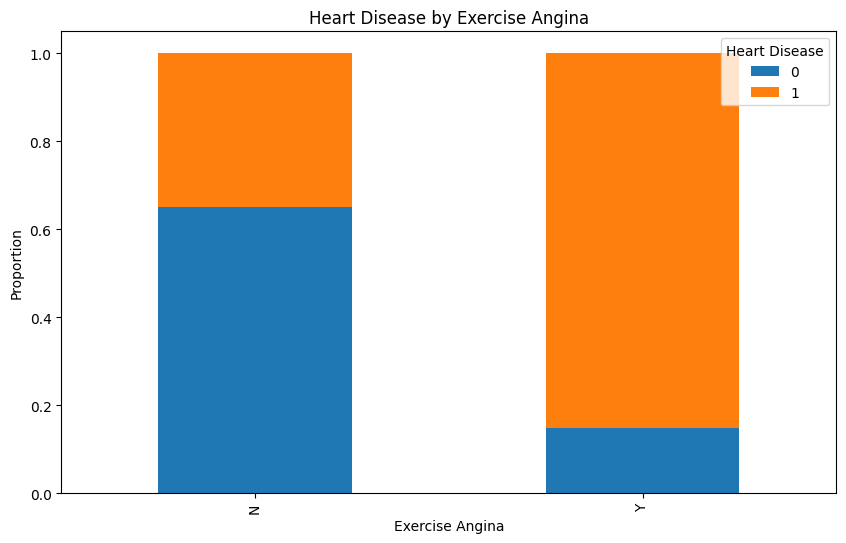

In [57]:
# Visualizing the relationship between ExerciseAngina and HeartDisease
st_hd_df = df.groupby('ExerciseAngina')['HeartDisease'].value_counts(normalize=True).unstack()
st_hd_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Heart Disease by Exercise Angina')
plt.xlabel('Exercise Angina')
plt.ylabel('Proportion')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

* Absolutely intuitive here. 90% of patients in our dataset with Exercise Angina are diagnosed with heart disease.

### OldPeak v. HeartDisease

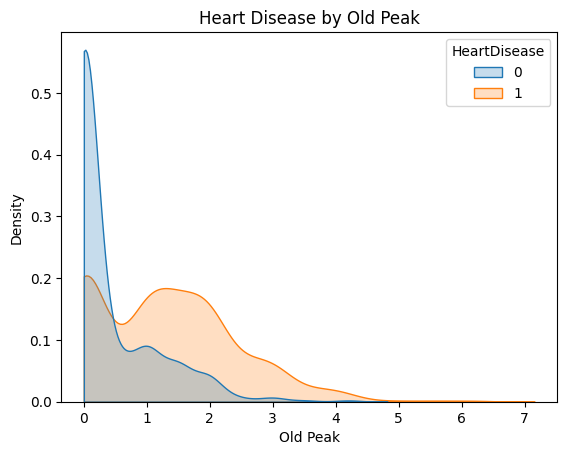

In [58]:
# Visualizing the relationship between Oldpeak and Heart Disease
sns.kdeplot(data=df, x='Oldpeak', hue='HeartDisease', fill=True, clip=(0, None))
plt.title('Heart Disease by Old Peak')
plt.xlabel('Old Peak')
plt.ylabel('Density')
plt.show()

* This pretty well aligns with the danger zone we see in the other variables. Oldpeak around 1.20 signifies an increased risk and can help us find those with heart disease in hard to distinguish groups like ASY patients and those with pretty average MaxHR.

# **Feature Engineering**

* As we noted earlier, Oldpeak, FastingBS and ST_Slope are all very helpful in predicting heart disease among those that are asymptomatic for Angina and have average MaxHR. We'll create three new features: Oldpeak x FastingBS (OPxBS) to cancel out the risk associated with elevated Oldpeak unless the patient is showing diabetic BS. Oldpeak_High for those with Oldpeak values of >= 1.20, and we'll add a third OPxBSxST in which we'll multiply OPxBS and ST_Slope after we give ST_Slope a manual ordinal value. Since upsloping ST_Slope is the most healthy and downsloping or flat ST_Slope are relatively the same in terms of risk, we'll ordinally encode ST_Slope as upsloping = 0, flat = 1, down = 2.

In [59]:
# Manually encoding ST_Slope
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

In [60]:
# Adding OPxBS variable
df['OPxBS'] = df['Oldpeak'] * df['FastingBS']

In [61]:
# Adding Oldpeak_High variable
df['Oldpeak_High'] = df['Oldpeak'].apply(lambda x: 1 if x >= 1.20 else 0)

In [62]:
# Adding OPxBSxST variable
df['OPxBSxST'] = df['OPxBS'] * df['ST_Slope']

In [63]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,OPxBS,Oldpeak_High,OPxBSxST
0,40,M,ATA,140,289,0,Normal,172,N,0.0,0,0,0.0,0,0.0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,1,1,0.0,0,0.0
2,37,M,ATA,130,283,0,ST,98,N,0.0,0,0,0.0,0,0.0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,1,1,0.0,1,0.0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,0,0,0.0,0,0.0


# **Data Preprocessing**

## Pipeline Creation

* Since we'll be building both regression and tree models, we'll need to set up two pipelines.

In [64]:
# Defining the categorical variables to onehotencode
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']

# Defining the columns to logtransform using np.log (and then scale for linear models)
log_cols = ['Cholesterol']

# Defining the columns to logtransform using np.log1p (and then scale for linear models)
log1p_cols = ['Oldpeak']

# Defining other numeric variables that will be scaled (for linear models) or passed through (for tree models)
# Ensure these are distinct from log_cols and log1p_cols and cover all remaining numeric features in X
other_numeric_cols = [
    'Age', 'RestingBP', 'FastingBS', 'MaxHR', 'ST_Slope',
    'OPxBS', 'Oldpeak_High', 'OPxBSxST'
]


In [65]:
# Importing FunctionTransformer for logtransforming pipeline
from sklearn.preprocessing import FunctionTransformer

# Setting up the log transformers
log_transformer = FunctionTransformer(np.log)
log1p_transformer = FunctionTransformer(np.log1p)

# Setting up the scale
scaler = StandardScaler()

In [66]:
# Importing ColumnTransformer for my preprocessing
from sklearn.compose import ColumnTransformer

In [67]:
# Importing the pipeline from sklearn
from sklearn.pipeline import Pipeline

In [68]:
# Building my ColumnTransformer for my scaled data pipeline for LR and SVC models
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('log_chol', Pipeline([('log', log_transformer), ('scale', scaler)]), log_cols),
        ('log1p_op', Pipeline([('log1p', log1p_transformer), ('scale', scaler)]), log1p_cols),
        ('scale_other_numeric', scaler, other_numeric_cols), # Use the new list for other numeric columns
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough' # Explicitly pass through any unlisted columns, or use 'drop' if none are intended to remain
)

In [69]:
# Building my ColumnTransformer for my tree-based models
# For tree-based models, scaling is often not necessary, but log transformations for skewed data can be beneficial.
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('log_chol', log_transformer, log_cols), # Apply log-transform directly, no scaling for tree models
        ('log1p_op', log1p_transformer, log1p_cols), # Apply log1p-transform directly, no scaling for tree models
        ('passthrough_other_numeric', 'passthrough', other_numeric_cols), # Pass through other numeric columns
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough' # Explicitly pass through any unlisted columns
)

In [70]:
# Setting up my pipelines
pipeline_scaled = Pipeline([
    ('preprocessor', preprocessor_scaled),
    ('model', LogisticRegression(random_state=42))
])

pipeline_svc = Pipeline([
    ('preprocessor', preprocessor_scaled),
    ('model', SVC(random_state=42))
])

pipeline_tree = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', DecisionTreeClassifier(random_state=42))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor_tree),
    ('model', XGBClassifier(random_state=42))
])

## Splitting the Dataset

In [71]:
# Separating the dataset into X and y
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [72]:
# Splitting the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Filling Missing Values

#### Cholesterol Treatment

In [73]:
# Creating age bins for X_train
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
X_train['Age_Group'] = pd.cut(X_train['Age'], bins=bins, labels=labels)

# Creating a list of the columns to groupby
groupby_cols = ['Age_Group', 'Sex', 'FastingBS']

# Calculate overall mean for fallback (accessible within the function)
overall_mean_chol = X_train.loc[X_train['Cholesterol'] != 0, 'Cholesterol'].mean()

# Grouping by Age_Group, Sex, and FastingBS and calculating the mean of Cholesterol
group_means = X_train[X_train['Cholesterol'] != 0].groupby(groupby_cols)['Cholesterol'].mean()

# Creating a function to fill the columns with the means
def fill_missing_chol(row):
    if row['Cholesterol'] == 0:                                                       # If Cholesterol value is 0
        try:                                                                          # try
          imputed_val = group_means.loc[(row['Age_Group'], row['Sex'], row['FastingBS'])] # Get the group mean
          if pd.isna(imputed_val):                                                    # If the group mean itself is NaN
              return overall_mean_chol                                                # then return the overall mean
          else:
              return imputed_val                                                      # Otherwise, return the group mean
        except KeyError:                                                              # unless you get an error (group not found in group_means)
          return overall_mean_chol                                                    # then return the overall mean
    else:
        return row['Cholesterol']                                                     # If Cholesterol already has a value, return that value

# Filling in the dataframe using the function
X_train['Cholesterol'] = X_train.apply(fill_missing_chol, axis=1)

# Dropping the Age_Group column now that we no longer need it.
X_train.drop('Age_Group', axis=1, inplace=True)

In [74]:
# Creating age bins for X_train
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
X_train['Age_Group'] = pd.cut(X_train['Age'], bins=bins, labels=labels)

# Creating a list of the columns to groupby
groupby_cols = ['Age_Group', 'Sex', 'FastingBS']

# Calculate overall mean for fallback (accessible within the function)
overall_mean_chol = X_train.loc[X_train['Cholesterol'] != 0, 'Cholesterol'].mean()

# Grouping by Age_Group, Sex, and FastingBS and calculating the mean of Cholesterol
group_means = X_train[X_train['Cholesterol'] != 0].groupby(groupby_cols)['Cholesterol'].mean()

# Creating a function to fill the columns with the means
def fill_missing_chol(row):
    if row['Cholesterol'] == 0:                                                       # If Cholesterol value is 0
        try:                                                                          # try
          imputed_val = group_means.loc[(row['Age_Group'], row['Sex'], row['FastingBS'])] # Get the group mean
          if pd.isna(imputed_val):                                                    # If the group mean itself is NaN
              return overall_mean_chol                                                # then return the overall mean
          else:
              return imputed_val                                                      # Otherwise, return the group mean
        except KeyError:                                                              # unless you get an error (group not found in group_means)
          return overall_mean_chol                                                    # then return the overall mean
    else:
        return row['Cholesterol']                                                     # If Cholesterol already has a value, return that value

# Filling in the dataframe using the function
X_train['Cholesterol'] = X_train.apply(fill_missing_chol, axis=1)

# Dropping the Age_Group column now that we no longer need it.
X_train.drop('Age_Group', axis=1, inplace=True)


In [75]:
# Finding the overall mean of X_train (re-defining for clarity/robustness if run independently)
overall_mean_chol = X_train.loc[X_train['Cholesterol'] != 0, 'Cholesterol'].mean()

# Creating age bins for X_test
bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
X_test['Age_Group'] = pd.cut(X_test['Age'], bins=bins, labels=labels)

# Defining a function to fill X_test
def fill_missing_chol_test(row, group_means, overall_mean_chol):
    if row['Cholesterol'] == 0:
        try:
          imputed_val = group_means.loc[(row['Age_Group'], row['Sex'], row['FastingBS'])]
          if pd.isna(imputed_val): # If the group mean itself is NaN
              return overall_mean_chol
          else:
              return imputed_val
        except KeyError:
          return overall_mean_chol
    else:
        return row['Cholesterol']

# Calling the function on X_test
X_test['Cholesterol'] = X_test.apply(lambda row: fill_missing_chol_test(row, group_means, overall_mean_chol), axis=1)

# Dropping Age_Group from X_test
X_test.drop('Age_Group', axis=1, inplace=True)


# **Model Building**

In [76]:
# Creating a dataframe to store test results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [77]:
# Defining a function to calculate evaluation metrics
def evaluation_metrics(y_test, y_pred, model_name=None):
  global results_df
  row = {
      'Model': model_name,
      'Accuracy': accuracy_score(y_test, y_pred),
      'Precision': precision_score(y_test, y_pred),
      'Recall': recall_score(y_test, y_pred),
      'F1 Score': f1_score(y_test, y_pred)
  }
  results_df = pd.concat([results_df, pd.DataFrame([row])], ignore_index=True)
  return results_df

### Logistic Regression

In [78]:
# Using the pipeline to build and fit a Logistic Regression model
pipeline_scaled.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_chol',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Cholesterol']),
                                                 ('log1p_op',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Oldpeak']),
                                                 ('scale_other_numeric',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'FastingBS', 'MaxHR',
                                                   'ST_Slope', 'OPxBS',
                                                   'Oldpeak_High',
                                                   'OPxBSxST']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina'])])),
                ('model', LogisticRegression(random_state=42))])

In [79]:
# Making predictions with LR
y_pred_train_lr = pipeline_scaled.predict(X_train)
y_pred_test_lr = pipeline_scaled.predict(X_test)

In [80]:
# Displaying our evaluation metrics for LR
evaluation_metrics(y_train, y_pred_train_lr, model_name='LR Train')
evaluation_metrics(y_test, y_pred_test_lr, model_name='LR Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,LR Train,0.851296,0.854067,0.881481,0.867558
1,LR Test,0.869565,0.854545,0.921569,0.886792


<Axes: >

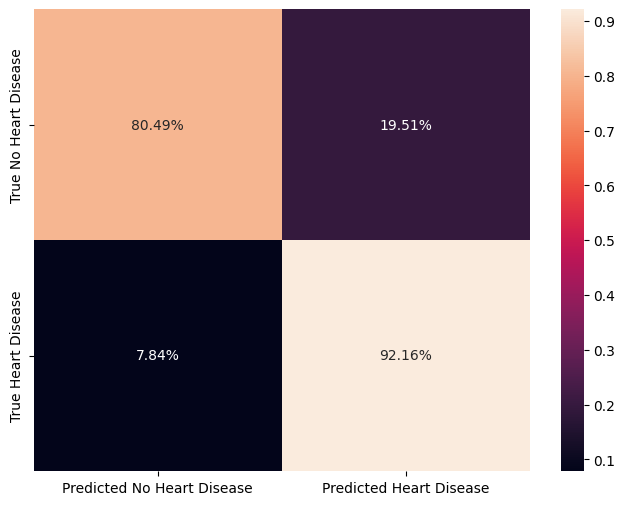

In [81]:
# Plotting the confusion matrix for LR
cf_lr = confusion_matrix(y_test, y_pred_test_lr, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_lr, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

### SVC

In [82]:
# Using the pipeline to build and fit an SVC model
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_chol',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Cholesterol']),
                                                 ('log1p_op',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Oldpeak']),
                                                 ('scale_other_numeric',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'FastingBS', 'MaxHR',
                                                   'ST_Slope', 'OPxBS',
                                                   'Oldpeak_High',
                                                   'OPxBSxST']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina'])])),
                ('model', SVC(random_state=42))])

In [83]:
# Making predictions with SVC
y_pred_train_svc = pipeline_svc.predict(X_train)
y_pred_test_svc = pipeline_svc.predict(X_test)

In [84]:
# Getting our evaluation metrics for SVC
evaluation_metrics(y_train, y_pred_train_svc, model_name='SVC Train')
evaluation_metrics(y_test, y_pred_test_svc, model_name='SVC Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,LR Train,0.851296,0.854067,0.881481,0.867558
1,LR Test,0.869565,0.854545,0.921569,0.886792
2,SVC Train,0.881310,0.871495,0.920988,0.895558
3,SVC Test,0.858696,0.845455,0.911765,0.877358


<Axes: >

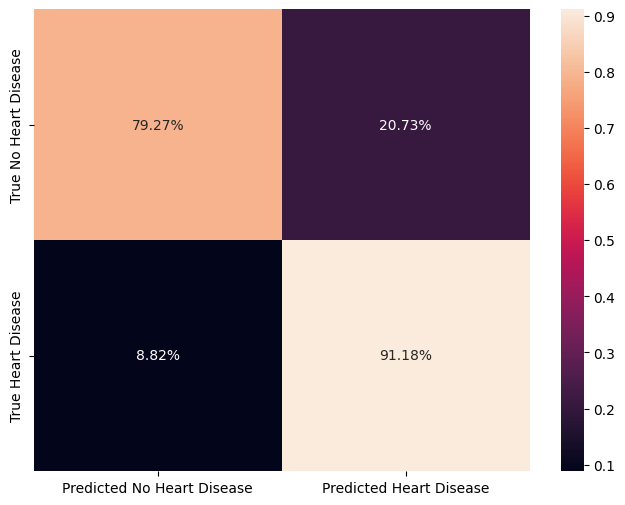

In [85]:
# Plotting the confusion matrix for SVC
cf_svc = confusion_matrix(y_test, y_pred_test_svc, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_svc, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

### Decision Tree

In [86]:
# Building our Decision Tree Classifier using our pipeline
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_chol',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['Cholesterol']),
                                                 ('log1p_op',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Oldpeak']),
                                                 ('passthrough_other_numeric',
                                                  'passthrough',
                                                  ['Age', 'RestingBP',
                                                   'FastingBS', 'MaxHR',
                                                   'ST_Slope', 'OPxBS',
                                                   'Oldpeak_High',
                                                   'OPxBSxST']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [87]:
# Making predictions with the decision tree
y_pred_train_tree = pipeline_tree.predict(X_train)
y_pred_test_tree = pipeline_tree.predict(X_test)

In [88]:
# Getting our evaluation metrics for our tree
evaluation_metrics(y_train, y_pred_train_tree, model_name='Tree Train')
evaluation_metrics(y_test, y_pred_test_tree, model_name='Tree Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,LR Train,0.851296,0.854067,0.881481,0.867558
1,LR Test,0.869565,0.854545,0.921569,0.886792
2,SVC Train,0.881310,0.871495,0.920988,0.895558
3,SVC Test,0.858696,0.845455,0.911765,0.877358
4,Tree Train,1.000000,1.000000,1.000000,1.000000
5,Tree Test,0.782609,0.829787,0.764706,0.795918


<Axes: >

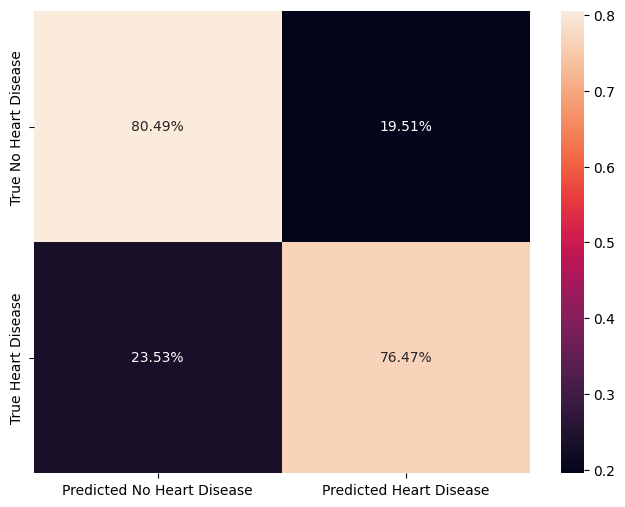

In [89]:
# Plotting the confusion matrix for our tree
cf_tree = confusion_matrix(y_test, y_pred_test_tree, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_tree, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

### Random Forest

In [90]:
# Building a Random Forest model with our pipeline
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_chol',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['Cholesterol']),
                                                 ('log1p_op',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Oldpeak']),
                                                 ('passthrough_other_numeric',
                                                  'passthrough',
                                                  ['Age', 'RestingBP',
                                                   'FastingBS', 'MaxHR',
                                                   'ST_Slope', 'OPxBS',
                                                   'Oldpeak_High',
                                                   'OPxBSxST']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [91]:
# Making predictions with Random Forest
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

In [92]:
# Getting our evaluation metrics for RF
evaluation_metrics(y_train, y_pred_train_rf, model_name='RF Train')
evaluation_metrics(y_test, y_pred_test_rf, model_name='RF Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,LR Train,0.851296,0.854067,0.881481,0.867558
1,LR Test,0.869565,0.854545,0.921569,0.886792
2,SVC Train,0.881310,0.871495,0.920988,0.895558
3,SVC Test,0.858696,0.845455,0.911765,0.877358
4,Tree Train,1.000000,1.000000,1.000000,1.000000
5,Tree Test,0.782609,0.829787,0.764706,0.795918
6,RF Train,1.000000,1.000000,1.000000,1.000000
7,RF Test,0.864130,0.873786,0.882353,0.878049


<Axes: >

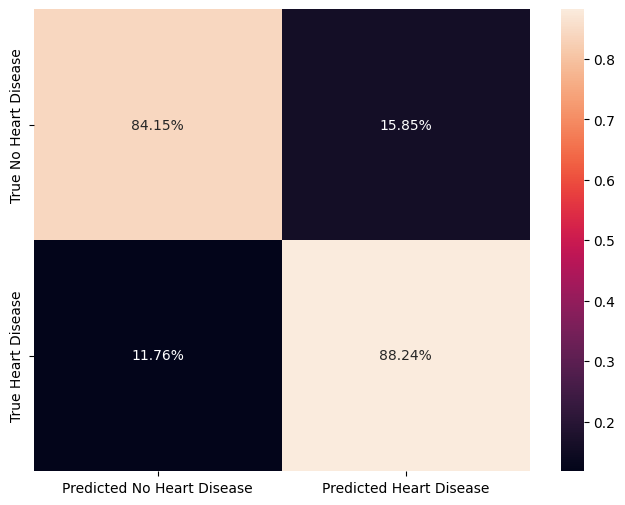

In [93]:
# Plotting our confusion matrix for RF
cf_rf = confusion_matrix(y_test, y_pred_test_rf, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_rf, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

### XGBoost Classifier

In [94]:
# Building our XGB model using our pipeline
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_chol',
                                                  FunctionTransformer(func=<ufunc 'log'>),
                                                  ['Cholesterol']),
                                                 ('log1p_op',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Oldpeak']),
                                                 ('passthrough_other_numeric',
                                                  'passthrough',
                                                  ['Age', 'RestingBP',
                                                   'FastingBS', 'MaxHR',
                                                   'ST_Slope', 'OPxBS',
                                                   'Oldpeak_High',
                                                   'OPxBSxST'])...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [95]:
# Making predictions using XGB
y_pred_train_xgb = pipeline_xgb.predict(X_train)
y_pred_test_xgb = pipeline_xgb.predict(X_test)

In [96]:
# Getting our evaluation metrics for XGB
evaluation_metrics(y_train, y_pred_train_xgb, model_name='XGB Train')
evaluation_metrics(y_test, y_pred_test_xgb, model_name='XGB Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,LR Train,0.851296,0.854067,0.881481,0.867558
1,LR Test,0.869565,0.854545,0.921569,0.886792
2,SVC Train,0.881310,0.871495,0.920988,0.895558
3,SVC Test,0.858696,0.845455,0.911765,0.877358
4,Tree Train,1.000000,1.000000,1.000000,1.000000
5,Tree Test,0.782609,0.829787,0.764706,0.795918
6,RF Train,1.000000,1.000000,1.000000,1.000000
7,RF Test,0.864130,0.873786,0.882353,0.878049
8,XGB Train,1.000000,1.000000,1.000000,1.000000
9,XGB Test,0.853261,0.871287,0.862745,0.866995


<Axes: >

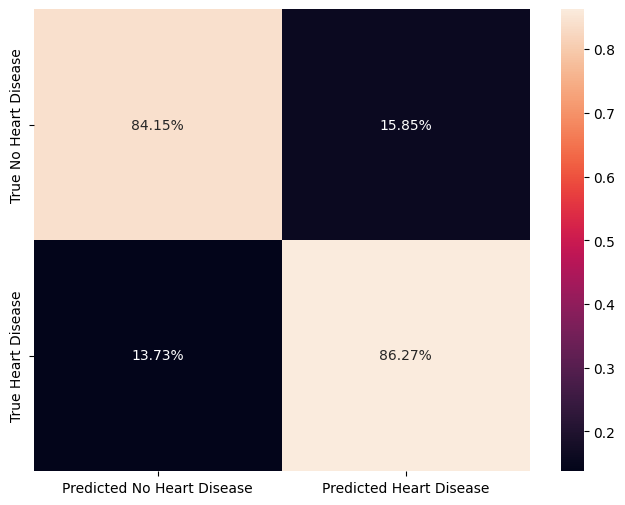

In [97]:
# Plotting our confusion matrix for XGB
cf_xgb = confusion_matrix(y_test, y_pred_test_xgb, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_xgb, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

In [98]:
# Displaying the results of all of our models thus far
results_df.T

,0,1,2,3,4,5,6,7,8,9
Model,LR Train,LR Test,SVC Train,SVC Test,Tree Train,Tree Test,RF Train,RF Test,XGB Train,XGB Test
Accuracy,0.851296,0.869565,0.88131,0.858696,1.0,0.782609,1.0,0.86413,1.0,0.853261
Precision,0.854067,0.854545,0.871495,0.845455,1.0,0.829787,1.0,0.873786,1.0,0.871287
Recall,0.881481,0.921569,0.920988,0.911765,1.0,0.764706,1.0,0.882353,1.0,0.862745
F1 Score,0.867558,0.886792,0.895558,0.877358,1.0,0.795918,1.0,0.878049,1.0,0.866995


* With such similar performances between LR and SVC at around 92, and 91% recall scores, we'll further tune both to see if we can get better performance, and since we'll need the LR model to explain the feature importances of SVC anyway, it won't hurt.
* All of our decision tree models were very overfit, and because of that, we know we can get better performance through tuning. However, the performance of the base DT was the worst, so we won't further tune that model.

# **Model Tuning**

### Parameter Setup, Cross Validation, and Scoring Strategy

In [99]:
# Clearing out our results_df
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [100]:
# Importing StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Importing make_scorer and fbeta_score to prioritize recall
from sklearn.metrics import make_scorer, fbeta_score

In [101]:
# Setting up our parameter grids
lr_param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga', 'lbfgs'], # Corrected 'lbgf' to 'lbfgs'
    'model__class_weight': ['balanced', {1:2}, {1:3}]
}


svc_param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'model__gamma': ['scale', 'auto', 0.1, 1, 10],
    'model__class_weight': [None, 'balanced', {1:2}, {1:3}]
}

rf_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__class_weight': [None, 'balanced', {1:2}, {1:3}]
}

xgb_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5],
    'model__subsample': [0.8, 0.9, 1.0],
}

In [102]:
# Setting our cross validation parameters
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [103]:
# Setting up our scoring parameter as beta=2 to optimize/prioritize recall over precision.
scorer = make_scorer(fbeta_score, beta=2)

### LR

In [104]:
# Creating a grid search object for our lr model
grid_search_lr = GridSearchCV(estimator=pipeline_scaled, param_grid=lr_param_grid, cv=cv, scoring=scorer, n_jobs=-1, return_train_score=True)

# Fitting to X_train and y_train
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log_chol',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log'>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Cholesterol']),
                                                                        ('log1p_op',
                                                                         Pipeline(steps=[('log1p',
                                                                                          FunctionTransformer(f...
                                                                          'RestingECG',
                                                                          'ExerciseAngina'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__class_weight': ['balanced', {1: 2}, {1: 3}],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [105]:
# Making predictions with our tuned_lr model
y_pred_train_tuned_lr = grid_search_lr.predict(X_train)
y_pred_test_tuned_lr = grid_search_lr.predict(X_test)

In [106]:
# Getting our evaluation metrics
evaluation_metrics(y_train, y_pred_train_tuned_lr, model_name='Tuned LR Train')
evaluation_metrics(y_test, y_pred_test_tuned_lr, model_name='Tuned LR Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned LR Train,0.825375,0.774257,0.965432,0.859341
1,Tuned LR Test,0.836957,0.795082,0.950980,0.866071


<Axes: >

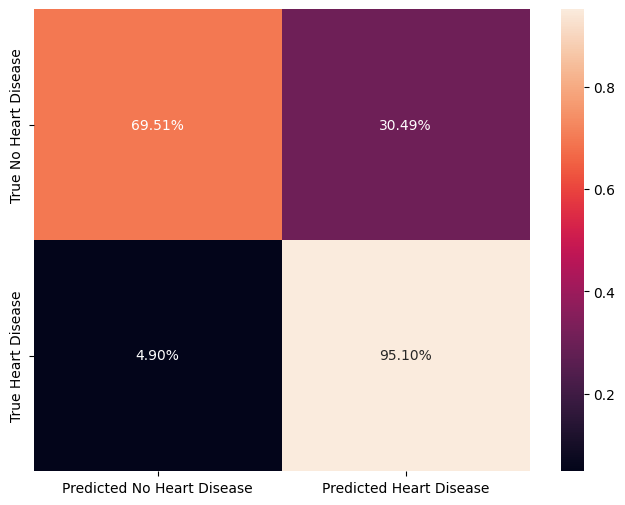

In [107]:
# Plotting the confusion matrix for LR
cf_tuned_lr = confusion_matrix(y_test, y_pred_test_tuned_lr, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_tuned_lr, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

* We were able to get about 3% performance increase on our LR model through tuning.

### SVC

In [108]:
# Creating a grid searh object for our SVC model
grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=svc_param_grid, cv=cv, scoring=scorer, n_jobs=-1, return_train_score=True)

# Fitting to X_train and y_train
grid_search_svc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log_chol',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log'>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Cholesterol']),
                                                                        ('log1p_op',
                                                                         Pipeline(steps=[('log1p',
                                                                                          FunctionTransformer(f...
                                                                          'RestingECG',
                                                                          'ExerciseAngina'])])),
                                       ('model', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__class_weight': [None, 'balanced', {1: 2},
                                                 {1: 3}],
                         'model__gamma': ['scale', 'auto', 0.1, 1, 10],
                         'model__kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [109]:
# Making predictions with our tuned SVC model
y_pred_train_tuned_svc = grid_search_svc.predict(X_train)
y_pred_test_tuned_svc = grid_search_svc.predict(X_test)

In [110]:
# Getting our evaluation metrics
evaluation_metrics(y_train, y_pred_train_tuned_svc, model_name='Tuned SVC Train')
evaluation_metrics(y_test, y_pred_test_tuned_svc, model_name='Tuned SVC Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned LR Train,0.825375,0.774257,0.965432,0.859341
1,Tuned LR Test,0.836957,0.795082,0.950980,0.866071
2,Tuned SVC Train,0.856753,0.802419,0.982716,0.883463
3,Tuned SVC Test,0.831522,0.779528,0.970588,0.864629


<Axes: >

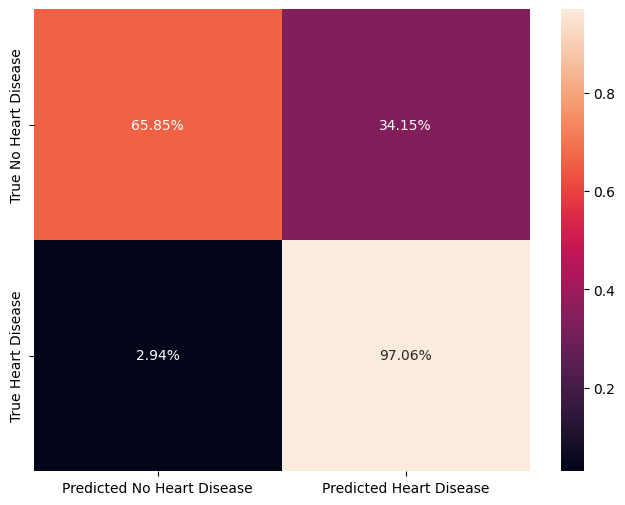

In [111]:
# Plotting the confusion matrix
cf_tuned_svc = confusion_matrix(y_test, y_pred_test_tuned_svc, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_tuned_svc, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

* NICE! We were able to get about a 6% increase in recall through tuning our SVC model with a recall score of 97%.

### RF

In [112]:
# Creating a grid search object for our rf model
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=rf_param_grid, cv=cv, scoring=scorer, n_jobs=-1)

# Fitting to X_train and y_train
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log_chol',
                                                                         FunctionTransformer(func=<ufunc 'log'>),
                                                                         ['Cholesterol']),
                                                                        ('log1p_op',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['Oldpeak']),
                                                                        ('passthrough_other_numeric',
                                                                         'passthrough',
                                                                         ['...
                                                                          'ExerciseAngina'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced', {1: 2},
                                                 {1: 3}],
                         'model__max_depth': [None, 5, 10],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [113]:
# Making predictions with our tuned RF model
y_pred_train_tuned_rf = grid_search_rf.predict(X_train)
y_pred_test_tuned_rf = grid_search_rf.predict(X_test)

In [114]:
# Getting our evaluation metrics
evaluation_metrics(y_train, y_pred_train_tuned_rf, model_name='Tuned RF Train')
evaluation_metrics(y_test, y_pred_test_tuned_rf, model_name='Tuned RF Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned LR Train,0.825375,0.774257,0.965432,0.859341
1,Tuned LR Test,0.836957,0.795082,0.950980,0.866071
2,Tuned SVC Train,0.856753,0.802419,0.982716,0.883463
3,Tuned SVC Test,0.831522,0.779528,0.970588,0.864629
4,Tuned RF Train,0.885402,0.837895,0.982716,0.904545
5,Tuned RF Test,0.858696,0.822034,0.950980,0.881818


<Axes: >

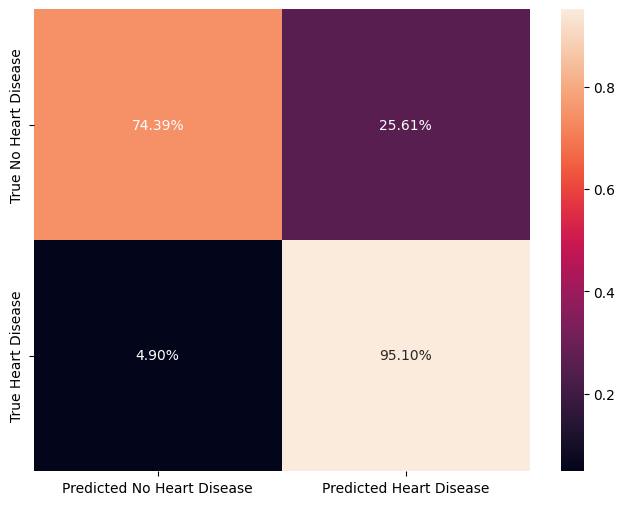

In [115]:
# Plotting the confusion matrix
cf_tuned_rf = confusion_matrix(y_test, y_pred_test_tuned_rf, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_tuned_rf, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

* We were able to get a 7% increase in recall score with our RF model with an 95.1% recall score.

### XGB

In [116]:
# Creating a grid search object for our XGB model
grid_search_xgb = GridSearchCV(estimator=pipeline_xgb, param_grid=xgb_param_grid, cv=cv, scoring=scorer, n_jobs=-1)

# Fitting to X_train and y_train
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log_chol',
                                                                         FunctionTransformer(func=<ufunc 'log'>),
                                                                         ['Cholesterol']),
                                                                        ('log1p_op',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['Oldpeak']),
                                                                        ('passthrough_other_numeric',
                                                                         'passthrough',
                                                                         ['...
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [3, 4, 5],
                         'model__n_estimators': [50, 100, 200],
                         'model__subsample': [0.8, 0.9, 1.0]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [117]:
# Making predictions with our tuned XGB model
y_pred_train_tuned_xgb = grid_search_xgb.predict(X_train)
y_pred_test_tuned_xgb = grid_search_xgb.predict(X_test)

In [118]:
# Getting our evaluation metrics
evaluation_metrics(y_train, y_pred_train_tuned_xgb, model_name='Tuned XGB Train')
evaluation_metrics(y_test, y_pred_test_tuned_xgb, model_name='Tuned XGB Test')

,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned LR Train,0.825375,0.774257,0.965432,0.859341
1,Tuned LR Test,0.836957,0.795082,0.950980,0.866071
2,Tuned SVC Train,0.856753,0.802419,0.982716,0.883463
3,Tuned SVC Test,0.831522,0.779528,0.970588,0.864629
4,Tuned RF Train,0.885402,0.837895,0.982716,0.904545
5,Tuned RF Test,0.858696,0.822034,0.950980,0.881818
6,Tuned XGB Train,0.852660,0.826374,0.928395,0.874419
7,Tuned XGB Test,0.826087,0.801724,0.911765,0.853211


<Axes: >

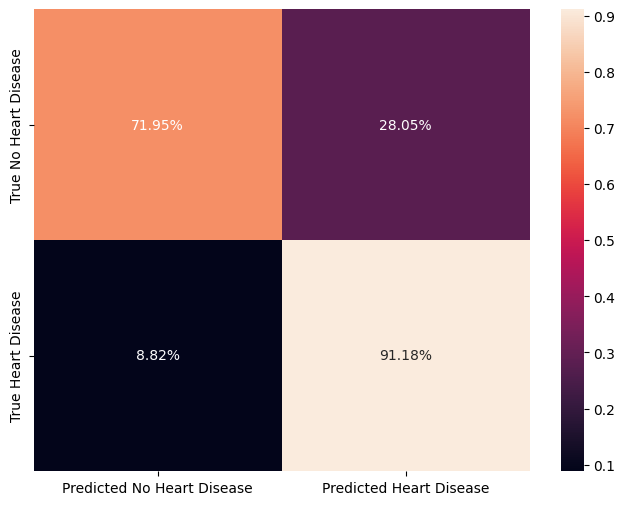

In [119]:
# Plotting our confusion matrix
cf_tuned_xgb = confusion_matrix(y_test, y_pred_test_tuned_xgb, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cf_tuned_xgb, annot=True, fmt='.2%', xticklabels=['Predicted No Heart Disease', 'Predicted Heart Disease'], yticklabels=['True No Heart Disease', 'True Heart Disease'])

* We were able to get about a 5% increase in recall score for XGB, but it is falling short of the results we achieved with our other models.

# **Final Model Selection**

In [120]:
# Displaying the results of our tuned models
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned LR Train,0.825375,0.774257,0.965432,0.859341
1,Tuned LR Test,0.836957,0.795082,0.950980,0.866071
2,Tuned SVC Train,0.856753,0.802419,0.982716,0.883463
3,Tuned SVC Test,0.831522,0.779528,0.970588,0.864629
4,Tuned RF Train,0.885402,0.837895,0.982716,0.904545
5,Tuned RF Test,0.858696,0.822034,0.950980,0.881818
6,Tuned XGB Train,0.852660,0.826374,0.928395,0.874419
7,Tuned XGB Test,0.826087,0.801724,0.911765,0.853211


* Our tuned SVC model had the best recall score and is very slighlty overfit, meaning it would generalize well on new data. Our SVC Tuned model will be our final selection.

# **Model Interpretability**


### Permutation Importance

In [121]:
# Getting the best parameters from our SVC Tuned model
best_params = grid_search_svc.best_params_
best_params

{'model__C': 1,
 'model__class_weight': {1: 3},
 'model__gamma': 'auto',
 'model__kernel': 'rbf'}

In [122]:
# Rewriting our pipeline with the best params from our grid search
# Extracting and cleaning best_params for direct use with SVC
cleaned_best_params = {}
for key, value in best_params.items():
    cleaned_best_params[key.replace('model__', '')] = value

pipeline_svc = Pipeline([
    ('preprocessor', preprocessor_scaled),
    ('model', SVC(random_state=42, probability=True, **cleaned_best_params)) # Added probability=True
])

# Fit the pipeline with the best parameters before using it for permutation importance
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log_chol',
                                                  Pipeline(steps=[('log',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Cholesterol']),
                                                 ('log1p_op',
                                                  Pipeline(steps=[('log1p',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['Oldpeak']),
                                                 ('scale_other_numeric',
                                                  StandardScaler(),
                                                  ['Age', 'RestingBP',
                                                   'FastingBS', 'MaxHR',
                                                   'ST_Slope', 'OPxBS',
                                                   'Oldpeak_High',
                                                   'OPxBSxST']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina'])])),
                ('model',
                 SVC(C=1, class_weight={1: 3}, gamma='auto', probability=True,
                     random_state=42))])

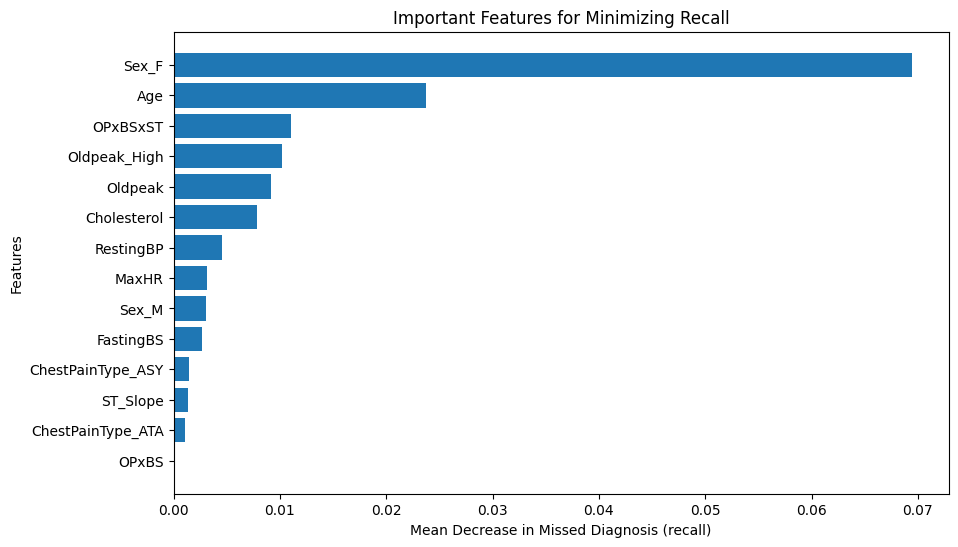

In [123]:
# Getting our permutation importances
svc_results = permutation_importance(pipeline_svc, X_test, y_test, n_repeats=30, scoring=scorer, random_state=42, n_jobs=-1)

# Extracting the importances
importances = svc_results.importances_mean

# Getting the feature names out
num_features = log_cols + log1p_cols + other_numeric_cols
cat_features = pipeline_svc.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(cat_cols)
all_features = np.concatenate([num_features, cat_features])

# Sorting features by importance
sorted_idx = np.argsort(importances)

# Plotting the importances
plt.figure(figsize=(10, 6))
plt.barh(all_features[sorted_idx], importances[sorted_idx], align='center')
plt.xlabel('Mean Decrease in Missed Diagnosis (recall)')
plt.ylabel('Features')
plt.title('Important Features for Minimizing Recall')
plt.show()

### Global Surrogate Model

In [124]:
# Fitting our grid_search_lr model to X_test and y_pred_test_svc
grid_search_lr.fit(X_test, y_pred_test_svc)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log_chol',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log'>)),
                                                                                         ('scale',
                                                                                          StandardScaler())]),
                                                                         ['Cholesterol']),
                                                                        ('log1p_op',
                                                                         Pipeline(steps=[('log1p',
                                                                                          FunctionTransformer(f...
                                                                          'RestingECG',
                                                                          'ExerciseAngina'])])),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'model__class_weight': ['balanced', {1: 2}, {1: 3}],
                         'model__penalty': ['l1', 'l2'],
                         'model__solver': ['liblinear', 'saga', 'lbfgs']},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [125]:
# Making predictions with our surrogate lr
y_pred_surrogate_lr = grid_search_lr.predict(X_test)

In [126]:
# Getting the evaluation metrics
evaluation_metrics(y_test, y_pred_surrogate_lr, model_name='Surrogate LR')

,Model,Accuracy,Precision,Recall,F1 Score
0,Tuned LR Train,0.825375,0.774257,0.965432,0.859341
1,Tuned LR Test,0.836957,0.795082,0.950980,0.866071
2,Tuned SVC Train,0.856753,0.802419,0.982716,0.883463
3,Tuned SVC Test,0.831522,0.779528,0.970588,0.864629
4,Tuned RF Train,0.885402,0.837895,0.982716,0.904545
5,Tuned RF Test,0.858696,0.822034,0.950980,0.881818
6,Tuned XGB Train,0.852660,0.826374,0.928395,0.874419
7,Tuned XGB Test,0.826087,0.801724,0.911765,0.853211
8,Surrogate LR,0.858696,0.845455,0.911765,0.877358


In [127]:
# Extract and sort feature coefficients
coefs_dict = {}
for feature, coef in zip(X_test.columns, grid_search_lr.best_estimator_.named_steps['model'].coef_[0]):
    if abs(coef) > 0.01:
      coefs_dict[feature] = coef
coefs_dict = {k: v for k, v in sorted(coefs_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
coefs_dict

{'RestingECG': np.float64(12.972911761756036),
 'MaxHR': np.float64(8.07258670996797),
 'OPxBS': np.float64(5.831267234887981),
 'Oldpeak_High': np.float64(5.70909049617777),
 'ExerciseAngina': np.float64(3.9310962503450857),
 'ST_Slope': np.float64(-3.756047919670924),
 'OPxBSxST': np.float64(-2.8788169037771825),
 'Sex': np.float64(2.707274822884905),
 'Cholesterol': np.float64(1.5951285007824483),
 'ChestPainType': np.float64(-1.5220254766838524),
 'Age': np.float64(1.087068967228029),
 'FastingBS': np.float64(-0.8521207619223127),
 'Oldpeak': np.float64(-0.7968994804686574),
 'RestingBP': np.float64(-0.43834451705336636)}

In [128]:
# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('Linear Variable Influence on Heart Disease Prediction')
    plt.show()


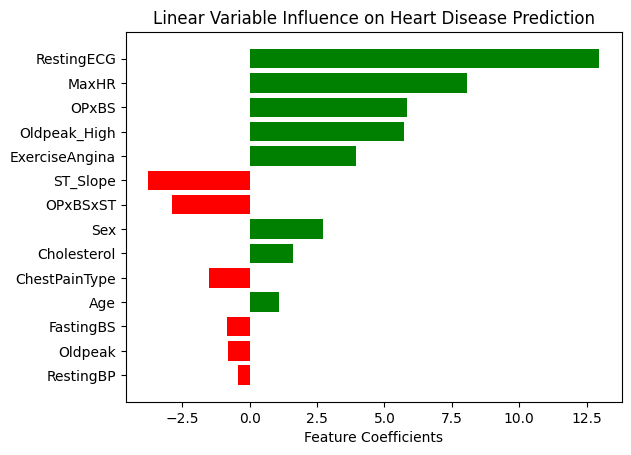

In [129]:
visualize_coefs(coefs_dict)

### SHAP

  0%|          | 0/184 [00:00<?, ?it/s]

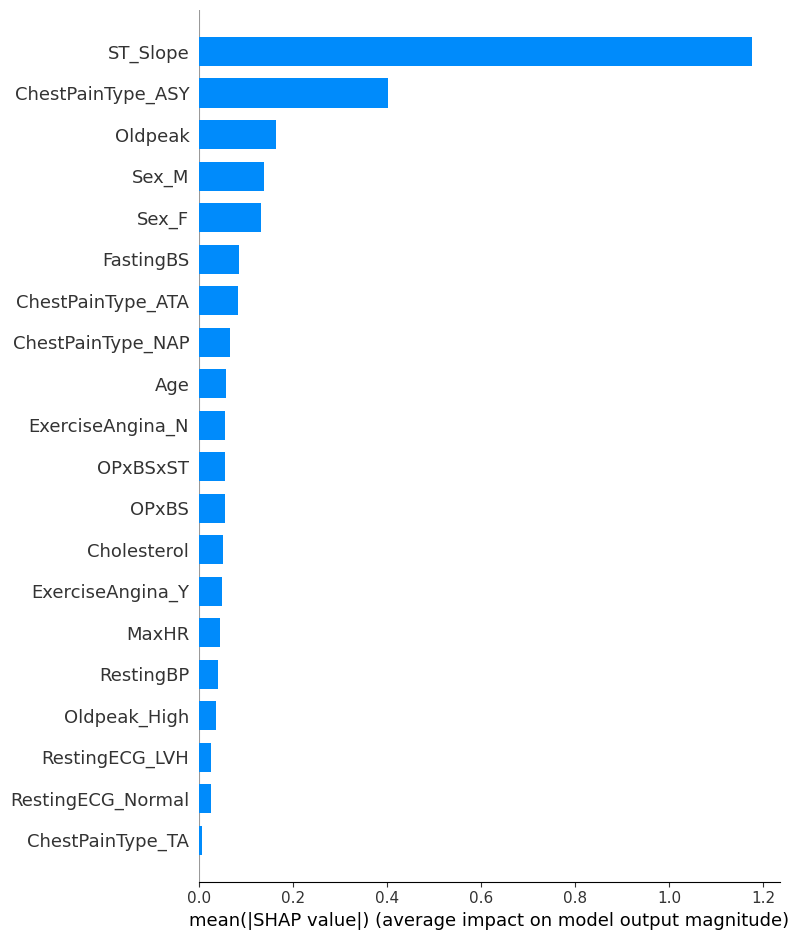

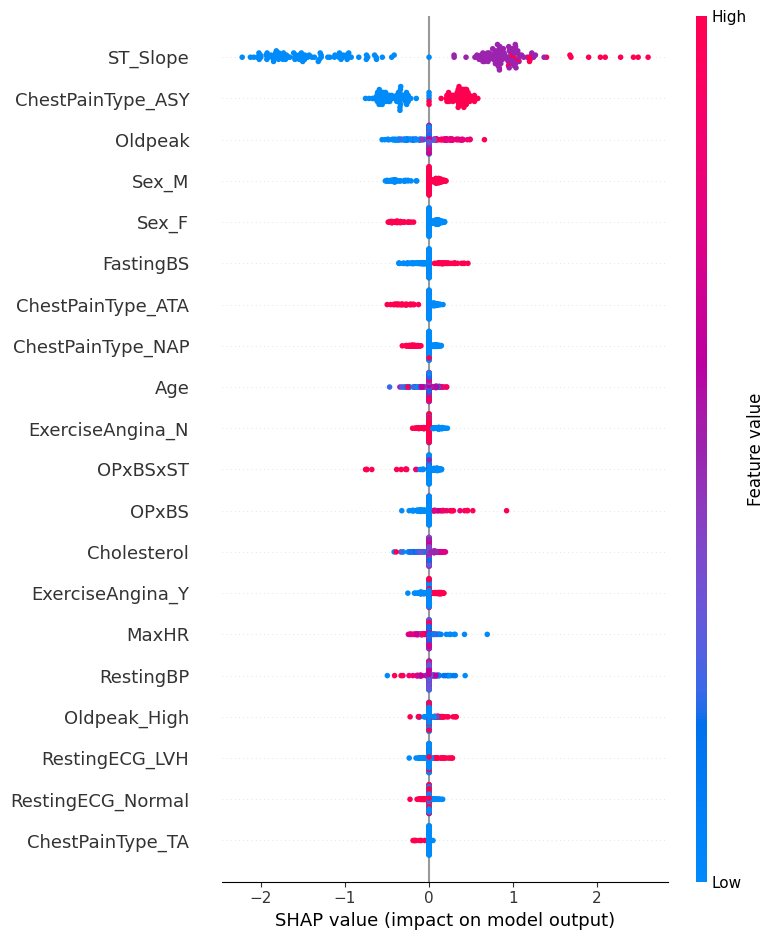

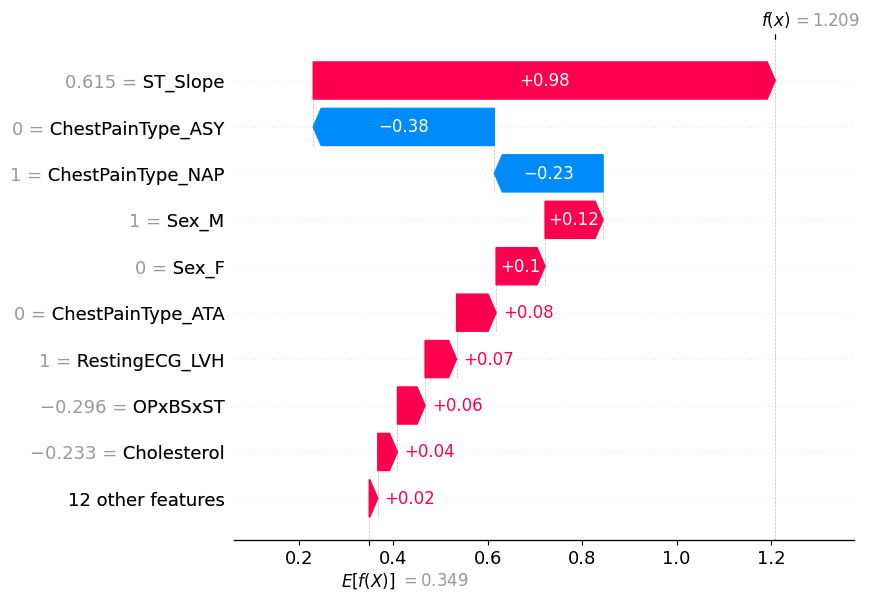

In [130]:
import shap
from sklearn.utils import resample

# Extract the preprocessor and the trained SVC model from the pipeline
preprocessor = pipeline_svc.named_steps['preprocessor']
svc_model = pipeline_svc.named_steps['model']

# Transform X_train and X_test using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train, y_train) # Use fit_transform on train data
X_test_processed = preprocessor.transform(X_test) # Use transform on test data

# Get feature names after preprocessing
num_features = log_cols + log1p_cols + other_numeric_cols
cat_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([num_features, cat_feature_names])

# Convert processed data back to DataFrame for SHAP, with correct feature names
X_train_processed_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

# samples
bg = shap.sample(X_train_processed_df, 100, random_state=42)
X_explain = shap.sample(X_test_processed_df, 200, random_state=1)

# Define a wrapper function to return probabilities for the positive class only
def predict_proba_positive_class(X):
    return svc_model.predict_proba(X)[:, 1]

# explainer
# Now pass the wrapper function that returns a single output
explainer = shap.KernelExplainer(predict_proba_positive_class, bg, link="logit")

# compute SHAP values for the single output (positive class)
# shap_values will now be a single array of shape (n_samples, n_features)
shap_vals_pos = explainer.shap_values(X_explain, nsamples=200)

# global importance bar plot
shap.summary_plot(shap_vals_pos, X_explain, plot_type="bar")

# beeswarm
shap.summary_plot(shap_vals_pos, X_explain)

# local waterfall/force for the first sample
shap.plots.waterfall(shap.Explanation(values=shap_vals_pos[0],
                                     base_values=explainer.expected_value,
                                     data=X_explain.iloc[0]))

# **Key Findings**

* **ST_Slope is the dominant predictor of heart disease:** Far outweighing all other features in importance, downsloping and flat segments during stess tests strongly indicate heart disease while upsloping segments signify healthy patients.
* **Patients without chest pain symptoms (ASY) are at higher risk:** This reveals the counterintuitive danger of "silent" heart disease that doesn't produce obvious warning signs. Diabetes, long-standing heart disease, or severe blockage can actually change or prevent patients from feeling typical chest pain.
* **Combining multiple measurements (engineered features) provides some additional insight:** OPxBS (Oldpeak × Resting Blood Sugar) shows modest predictive power, suggesting the interaction between ST depression and metabolic factors adds some discriminatory value, especially in areas where their individual values contain large overlaps of those with and without heart disease.
* **Traditional risk factors (age, cholesterol, blood pressure) contribute minimally:** Exercise-related cardiac changes are much more powerful in heart disease prediction, emphasizing the superiority of functional stress indicators over static demographic/laboratory values.